#### First, we're building dataframe (file name, and speaker number), and getting the features from the baseline data

#### We're then going to use this as our training set for use in the neural network

In [369]:
# List the files from baseline voice files; put them in a dataframe
trainFileList = os.listdir('../pickles/data/train')
train_df = pd.DataFrame(trainFileList)


In [370]:
# Rename first column to file
train_df = train_df.rename(columns={0: 'file'})
train_df.head()


,file
0,s1_baseline_AudioData__2022_03_291648593704_fe...
1,s1_baseline_AudioData__2022_03_291648593713_fe...
2,s1_baseline_AudioData__2022_03_291648593718_fe...
3,s1_baseline_AudioData__2022_03_291648593723_fe...
4,s1_baseline_AudioData__2022_03_291648593729_fe...


In [371]:
# Define train data directory
trainDataPath = '../pickles/data/train/'

# Get train data into dataframe
train_feature_labels = pd.concat([pd.read_pickle(trainDataPath + x) for x in os.listdir(trainDataPath)], ignore_index=True)

In [372]:
# Look at data
train_feature_labels.head()

0    ([-410.86383, 111.155106, 11.211696, 16.326588...
1    ([-383.7689, 125.523125, -1.1537461, 20.785316...
2    ([-395.27423, 123.77223, 7.026944, 22.09738, 4...
3    ([-361.597, 105.847855, 1.7953725, 33.84237, 1...
4    ([-375.46692, 123.409874, 7.233824, 16.259724,...
dtype: object

In [373]:
# "We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network"
train_features = []
for i in range(0, len(train_df)):
    train_features.append(np.concatenate((train_feature_labels[i][0], train_feature_labels[i][1],
                train_feature_labels[i][2], train_feature_labels[i][3],
                train_feature_labels[i][4]), axis=0))

In [374]:
# Shuffle the dataframe
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [375]:
# Make sure the number of features matches
print("Features Size: \t" + str(len(train_features)))
print("Dataframe Size: \t" + str(len(train_df)))

Features Size: 	253
Dataframe Size: 	253


In [376]:
train_speakers = []
for i in range(0, len(train_df)):
    train_speakers.append(train_df['file'][i].split('_')[0].strip('s'))

In [377]:
# Append the speaker list to the data
train_df['speaker'] = train_speakers


In [368]:
# Import libraries
import os

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [378]:
train_user = []
for i in range(0, len(train_df)):
    if train_df['file'][i].split('_')[0].strip('s') == '1':
        train_user.append('1')
    else:
        train_user.append('0')

In [379]:
train_df['user'] = train_user

In [380]:
# Look at data
train_df.head()

,file,speaker,user
0,s2_baseline_AudioData__2022_03_291648594352_fe...,2,0
1,s4_baseline_AudioData__2022_04_131649888571_fe...,4,0
2,s4_baseline_AudioData__2022_04_131649888870_fe...,4,0
3,s2_baseline_AudioData__2022_03_291648594371_fe...,2,0
4,s4_baseline_AudioData__2022_04_131649888533_fe...,4,0


In [381]:
# Check the number of unique speakers in the data
print("Number of unique speakers: " + str(train_df['speaker'].nunique()))

Number of unique speakers: 4


In [382]:
# Making new var that holds just the speaker list
train_labels = train_user
# Look at the length, making sure it's the same as the features
len(train_labels)

253

#### Hot encoding y and pre-processing X and y

In [383]:
X = np.array(train_features)
y = np.array(train_labels)

In [384]:
# Hot encoding y
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

In [385]:
X.shape

(253, 193)

In [386]:
y.shape

(253, 2)

In [387]:
# Define what index is 70% of the data (we will split this into the train and val data sets.)
# Note: we aren't doing test as of right now, because we have separate data for that
seventyPercIndex = round(train_feature_labels.size * .70)
print(seventyPercIndex)

177


In [388]:
# Put the first 75% of the data into the train arrays (X and y)
# X_train contains the features
X_train = X[:seventyPercIndex]
# y_train contains the labels, specifically the speaker/subject #
y_train = y[:seventyPercIndex]

# Note: It seems that the y set has been transformed into binary labels, which will have to be addressed later when we
#   add more speakers!!!

In [389]:
# Do the same, except for the rest of the data after 75% index
X_val = X[seventyPercIndex:]
y_val = y[seventyPercIndex:]

In [390]:
# Compare the shapes of the datasets, just to be sure they match up correctly
print("X_train Shape: \t" + str(X_train.shape))
print("X_val Shape: \t" + str(X_val.shape))

X_train Shape: 	(177, 193)
X_val Shape: 	(76, 193)


In [391]:
# Similar as above, just with the y data sets
print("y_train Shape: \t" + str(y_train.shape))
print("y_val Shape: \t" + str(y_val.shape))


y_train Shape: 	(177, 2)
y_val Shape: 	(76, 2)



---
#### Do the same as we just did, but for the testing data set



In [392]:
# List the files from use case voice files; put them in a dataframe
testFileList = os.listdir('../pickles/data/test')
test_df = pd.DataFrame(testFileList)


In [393]:
# Rename first column to file
test_df = test_df.rename(columns={0: 'file'})
test_df.head()


,file
0,s1_case_1_AudioData__2022_03_291648594561_feat...
1,s1_case_1_AudioData__2022_04_131649888950_feat...
2,s1_case_2_AudioData__2022_03_291648594964_feat...
3,s1_case_2_AudioData__2022_04_131649889207_feat...
4,s1_case_2_AudioData__2022_04_131649889345_feat...


In [394]:
# Define test data directory
testDataPath = '../pickles/data/test/'
# Get test data into dataframe
test_feature_labels = pd.concat([pd.read_pickle(testDataPath + x) for x in os.listdir(testDataPath)], ignore_index=True)

In [395]:
# Look at data
test_feature_labels.head()


0    ([-344.3096, 138.34344, -2.278195, 11.397168, ...
1    ([-317.62854, 104.90374, -5.141589, 45.528423,...
2    ([-355.696, 125.86441, 0.63355714, 4.304632, -...
3    ([-342.536, 107.22047, 10.101556, 22.23576, -4...
4    ([-338.0755, 110.37684, 7.379534, 23.920752, -...
dtype: object

In [396]:
# "We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network"
test_features = []
for i in range(0, len(test_df)):
    test_features.append(np.concatenate((test_feature_labels[i][0], test_feature_labels[i][1],
                test_feature_labels[i][2], test_feature_labels[i][3],
                test_feature_labels[i][4]), axis=0))


In [397]:
# Shuffle the dataframe
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [398]:
# Make sure the number of features matches
print("Features Size:\t" + str(len(test_features)))
print("Dataframe Size:\t" + str(len(test_df)))

Features Size:	36
Dataframe Size:	36


In [399]:
test_speakers = []
for i in range(0, len(test_df)):
    test_speakers.append(test_df['file'][i].split('_')[0].strip('s'))

In [400]:
# Append the speaker list to the data
test_df['speaker'] = test_speakers


In [401]:
# Create new 'user' list; we will use this to make binary classification
test_user = []
for i in range(0, len(test_df)):
    if test_df['file'][i].split('_')[0].strip('s') == '1':
        test_user.append('1')
    else:
        test_user.append('0')

In [402]:
# Add the user list to the dataframe
test_df['user'] = test_user


In [403]:
# Look at data
test_df.head()


,file,speaker,user
0,s1_case_4_AudioData__2022_03_291648595734_feat...,1,1
1,s1_case_2_AudioData__2022_03_291648594964_feat...,1,1
2,s2_case_3_AudioData__2022_03_291648595471_feat...,2,0
3,s3_case_5_AudioData__2022_04_131649890856_feat...,3,0
4,s2_case_1_AudioData__2022_03_291648594721_feat...,2,0


In [404]:
# Check the number of unique speakers in the data
print("Number of unique speakers: " + str(test_df['speaker'].nunique()))

Number of unique speakers: 4


In [405]:
# Making new var that holds just the speaker list
# test_labels = test_speakers
test_labels = test_user
# Look at the length, making sure it's the same as the features
len(test_labels)


36

#### Hot encoding y and pre-processing X and y (test data now)

In [406]:
X_test = np.array(test_features)
y_test = np.array(test_labels)

In [407]:
# Hot encoding y
lb = LabelEncoder()
y_test = to_categorical(lb.fit_transform(y_test))

In [408]:
# Look at the shapes of our newly created data
print("X_test Shape:\t" + str(X_test.shape))
print("y_test Shape:\t" + str(y_test.shape))

X_test Shape:	(36, 193)
y_test Shape:	(36, 2)


In [409]:
# Compare all the sets of data thus far
print("X_train Shape:\t" + str(X_train.shape))
print("X_val Shape:\t" + str(X_val.shape))
print("X_test Shape:\t" + str(X_test.shape))

X_train Shape:	(177, 193)
X_val Shape:	(76, 193)
X_test Shape:	(36, 193)


In [410]:
print("y_train Shape:\t" + str(y_train.shape))
print("y_val Shape:\t" + str(y_val.shape))
print("y_test Shape:\t" + str(y_test.shape))

y_train Shape:	(177, 2)
y_val Shape:	(76, 2)
y_test Shape:	(36, 2)


In [411]:
# Do more transformation with standard scaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


---
#### Now we move onto the creation of the model



In [412]:
model = Sequential()

# The input layer, taking in the 193 features
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

# Internal layer (TODO: change density of layer)
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

# Output layer - the final guess the NN makes (aka what speaker it thinks it is)
model.add(Dense(2, activation = 'softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [413]:
history = model.fit(X_train, y_train, batch_size=4, epochs=10,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/10
45/45 [==============================] - 0s 3ms/step - loss: 1.0422 - accuracy: 0.5102 - val_loss: 1.1784 - val_accuracy: 0.5658
Epoch 2/10
45/45 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.6990 - val_loss: 1.1622 - val_accuracy: 0.5658
Epoch 3/10
45/45 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8947 - val_loss: 1.3358 - val_accuracy: 0.5658
Epoch 4/10
45/45 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8840 - val_loss: 1.7606 - val_accuracy: 0.5263
Epoch 5/10
45/45 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.9089 - val_loss: 1.9695 - val_accuracy: 0.5132
Epoch 6/10
45/45 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9187 - val_loss: 2.2671 -

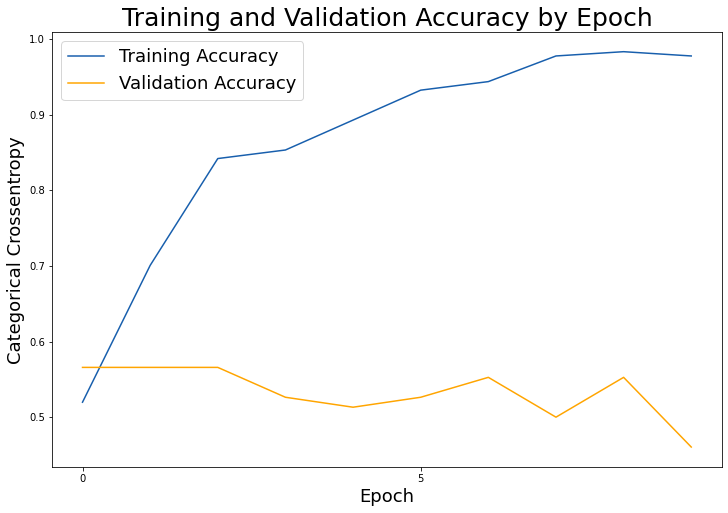

In [414]:
import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,10,5), range(0,10,5))

plt.legend(fontsize = 18);

In [415]:
# Get predictions from the test data
predictions = model.predict_classes(X_test)

D:\Anaconda\envs\scEnvo\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [416]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)

In [417]:
test_df['prediction'] = predictions

In [418]:
# Look at how the predictions match up
test_df

,file,speaker,user,prediction
0,s1_case_4_AudioData__2022_03_291648595734_feat...,1,1,0
1,s1_case_2_AudioData__2022_03_291648594964_feat...,1,1,0
2,s2_case_3_AudioData__2022_03_291648595471_feat...,2,0,0
3,s3_case_5_AudioData__2022_04_131649890856_feat...,3,0,1
4,s2_case_1_AudioData__2022_03_291648594721_feat...,2,0,1
5,s3_case_7_AudioData__2022_04_131649891922_feat...,3,0,0
6,s4_case_3_AudioData__2022_04_131649890078_feat...,4,0,0
7,s3_case_4_AudioData__2022_04_131649890730_feat...,3,0,1
8,s4_case_4_AudioData__2022_04_131649891017_feat...,4,0,1
9,s1_case_2_AudioData__2022_04_131649889345_feat...,1,1,0


In [419]:
# Check how many speakers we got wrong
test_df[test_df['speaker'] != test_df['prediction']]

,file,speaker,user,prediction
0,s1_case_4_AudioData__2022_03_291648595734_feat...,1,1,0
1,s1_case_2_AudioData__2022_03_291648594964_feat...,1,1,0
2,s2_case_3_AudioData__2022_03_291648595471_feat...,2,0,0
3,s3_case_5_AudioData__2022_04_131649890856_feat...,3,0,1
4,s2_case_1_AudioData__2022_03_291648594721_feat...,2,0,1
5,s3_case_7_AudioData__2022_04_131649891922_feat...,3,0,0
6,s4_case_3_AudioData__2022_04_131649890078_feat...,4,0,0
7,s3_case_4_AudioData__2022_04_131649890730_feat...,3,0,1
8,s4_case_4_AudioData__2022_04_131649891017_feat...,4,0,1
9,s1_case_2_AudioData__2022_04_131649889345_feat...,1,1,0


In [420]:
# Checking our model accuracy
1-round(len(test_df[test_df['speaker'] != test_df['prediction']])/len(test_df),3)

0.16700000000000004